In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,316200.0,30.569858,8.271802,17.0,24.0,30.0,36.0,123.0
new_user,316200.0,0.685465,0.464331,0.0,0.0,1.0,1.0,1.0
total_pages_visited,316200.0,4.872966,3.341104,1.0,2.0,4.0,7.0,29.0
converted,316200.0,0.032258,0.176685,0.0,0.0,0.0,0.0,1.0


1. user base is pretty young. but max age 123 seems weird.
2. Coversion rate at round 3% is industry standard, it makes sense. 

In [5]:
for column in df.columns:
    uniques = sorted(df[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques)

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 77, 79, 111, 123]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
converted                2	 [0, 1]


## Remove Outliers

#### Typically, age should be less than 100

In [6]:
df[df['age']>99]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


There are only two records. In this case, we can treat them as outliers and remove them.

In [7]:
df = df[df['age']<100]

In [8]:
df.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

##  Explorary Data Analysis

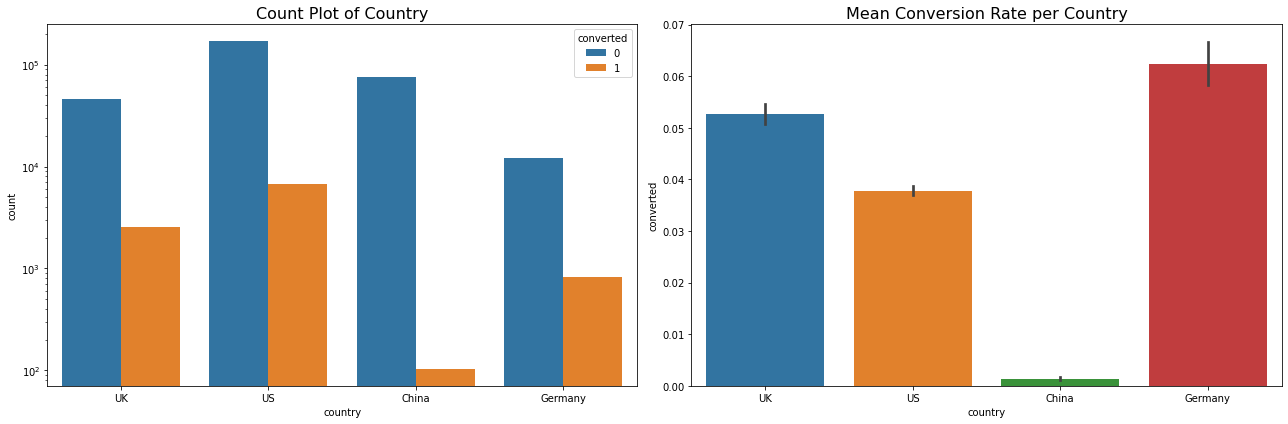

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(x='country', hue='converted',data=df,ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')  ##take logrithm of y
sns.barplot(x='country',y='converted', data=df,ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
plt.tight_layout()

#A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. 
It clearly looks like Chinese convert at a much lower rate than other countries

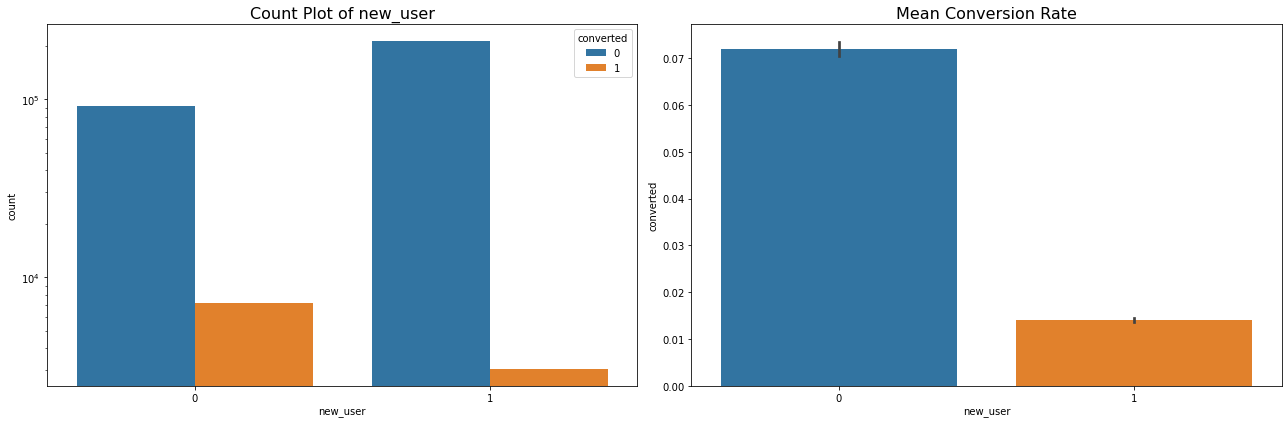

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(x='new_user', hue='converted',data=df,ax=ax[0])
ax[0].set_title('Count Plot of new_user', fontsize=16)
ax[0].set_yscale('log')  ##take logrithm of y
sns.barplot(x='new_user',y='converted', data=df,ax=ax[1])
ax[1].set_title('Mean Conversion Rate', fontsize=16)
plt.tight_layout()

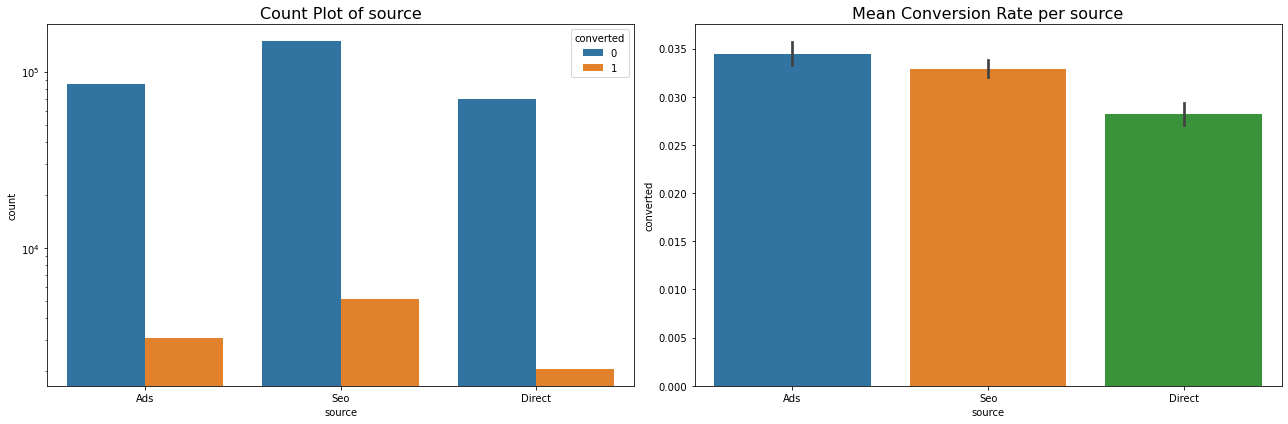

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(x='source', hue='converted',data=df,ax=ax[0])
ax[0].set_title('Count Plot of source', fontsize=16)
ax[0].set_yscale('log')  ##take logrithm of y
sns.barplot(x='source',y='converted', data=df,ax=ax[1])
ax[1].set_title('Mean Conversion Rate per source', fontsize=16)
plt.tight_layout()

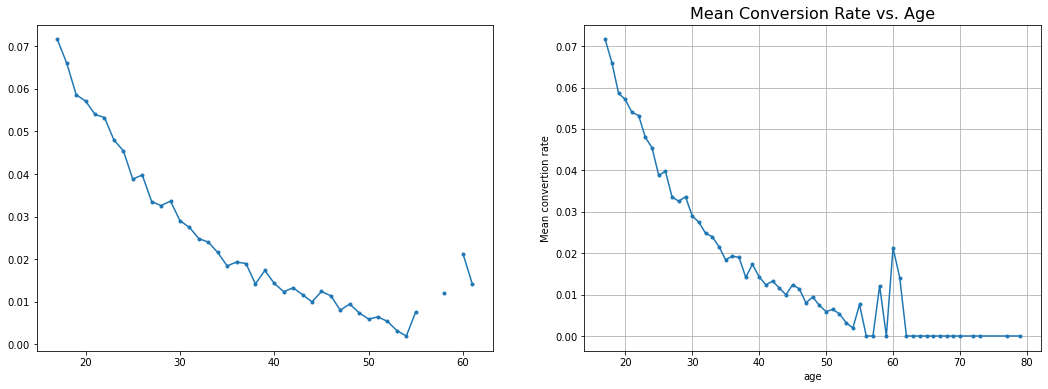

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
age_group = df.groupby('age')['converted'].count()
age_convertd = df[df['converted']==1].groupby('age')['converted'].count()
ax[0].plot(age_convertd/age_group, '.-')

grouped = df[['age', 'converted']].groupby('age').mean().reset_index()
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)

C:\Users\yijia\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yijia\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


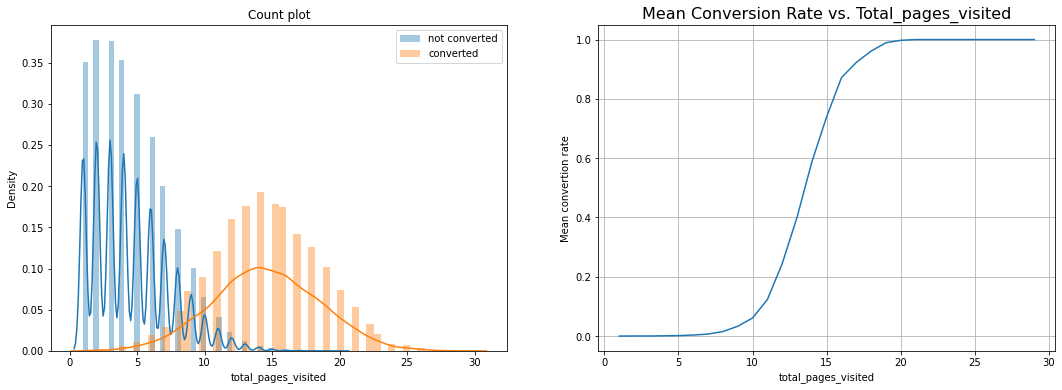

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
source_grouped = df.groupby('total_pages_visited')['converted'].mean().reset_index()

sns.distplot(df[df['converted']==0]['total_pages_visited'], ax=ax[0], label='not converted')
sns.distplot(df[df['converted']==1]['total_pages_visited'], ax=ax[0], label='converted')
ax[0].set_title('Count plot')
ax[0].legend()
ax[1].plot(source_grouped['total_pages_visited'], source_grouped['converted'])
ax[1].set_title('Mean Conversion Rate vs. Total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)

<AxesSubplot:>

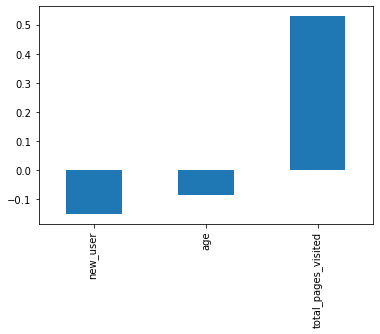

In [14]:
df.corr()['converted'][:-1].sort_values().plot(kind = 'bar')

In [15]:
country_dummies = pd.get_dummies(df['country'], drop_first=True)
country_dummies.head()

,Germany,UK,US
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,1


In [16]:
source_dummies = pd.get_dummies(df['source'], drop_first=True)
source_dummies.head()

,Direct,Seo
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1


In [17]:
df2 = df.drop( ['country', 'source'] , axis=1)
df2 = pd.concat([df2, source_dummies,country_dummies],axis=1)
df2.head()

,age,new_user,total_pages_visited,converted,Direct,Seo,Germany,UK,US
0,25,1,1,0,0,0,0,1,0
1,23,1,5,0,0,1,0,0,1
2,28,1,4,0,0,1,0,0,1
3,39,1,5,0,0,1,0,0,0
4,30,1,6,0,0,1,0,0,1


In [18]:
df2.select_dtypes(['object']).columns

Index([], dtype='object')

## Machine Learning

In [19]:
X = df2.drop('converted', axis=1)
y = df2['converted']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,  y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [23]:
pred= rfc.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))


[[91372   469]
 [  949  2070]]


In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91841
           1       0.82      0.69      0.74      3019

    accuracy                           0.99     94860
   macro avg       0.90      0.84      0.87     94860
weighted avg       0.98      0.99      0.98     94860



In [26]:
forest_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)

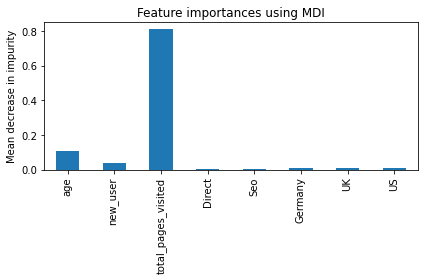

In [27]:
fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## DeepLearning

In [52]:
X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=101)
##Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [54]:
model = Sequential()
model.add(Dense(units=8,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')


In [55]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',  verbose=1, patience=5)

model.fit(x=X_train, y=y_train, epochs=600,
          validation_data=(X_val, y_val), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
4427/4427 [==============================] - 9s 2ms/step - loss: 0.1588 - val_loss: 0.0739
Epoch 2/600
4427/4427 [==============================] - 10s 2ms/step - loss: 0.0915 - val_loss: 0.0517
Epoch 3/600
4427/4427 [==============================] - 13s 3ms/step - loss: 0.0805 - val_loss: 0.0485
Epoch 4/600
4427/4427 [==============================] - 12s 3ms/step - loss: 0.0772 - val_loss: 0.0474
Epoch 5/600
4427/4427 [==============================] - 12s 3ms/step - loss: 0.0762 - val_loss: 0.0466
Epoch 6/600
4427/4427 [==============================] - 13s 3ms/step - loss: 0.0745 - val_loss: 0.0459
Epoch 7/600
4427/4427 [==============================] - 14s 3ms/step - loss: 0.0732 - val_loss: 0.0463
Epoch 8/600
4427/4427 [==============================] - 12s 3ms/step - loss: 0.0735 - val_loss: 0.0467
Epoch 9/600
4427/4427 [==============================] - 12s 3ms/step - loss: 0.0733 - val_loss: 0.0461
Epoch 10/600
4427/4427 [==============================] - 12s 3ms

<AxesSubplot:>

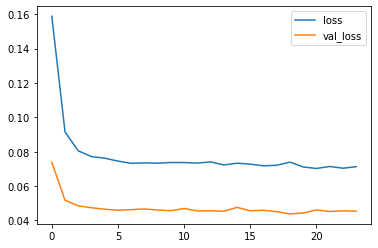

In [56]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [57]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)
print(confusion_matrix(y_test,predictions))

[[91557   284]
 [ 1029  1990]]


In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91841
           1       0.88      0.66      0.75      3019

    accuracy                           0.99     94860
   macro avg       0.93      0.83      0.87     94860
weighted avg       0.99      0.99      0.99     94860

